In [0]:
# Principal Component Analysis (PCA) - Dados sobre Diabetes

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Para a análise PCA, utilizou-se a seguinte metodologia: (i) subtração da média dos dados (ii) cálculo da matrix de 
# covariância, (iii) cálculo dos eigenvalues e eigenvectors (autovalores e autovetores) da matrix de covariância,
# (iv) seleção dos autovalores (e respectivos autovetores) mais relevantes (componentes, (v) redução da dimensionalidade
# com base nos componentes (autovalores/autovetores) "mais signigificantes."

In [0]:
# Foi realizada a extração dos itens (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
# ,Age) de diabetes.csv para a "diab"

diab = np.genfromtxt("diabetes.csv",delimiter=",", skip_header=1, usecols=(0,1,2,3,4,5,6,7))

In [0]:
# As colunas de "diab" representam (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
# ,Age) respectivamente.

diab

array([[  6. , 148. ,  72. , ...,  33.6, 627. ,  50. ],
       [  1. ,  85. ,  66. , ...,  26.6, 351. ,  31. ],
       [  8. , 183. ,  64. , ...,  23.3, 672. ,  32. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2, 245. ,  30. ],
       [  1. , 126. ,  60. , ...,  30.1, 349. ,  47. ],
       [  1. ,  93. ,  70. , ...,  30.4, 315. ,  23. ]])

In [0]:
# Ajusta-se os dados de "diab" por meio da substração das respectivas médias para "centralizar" os dados.

diab_ajust = diab - diab.mean(axis=0)


In [0]:
diab_ajust

array([[ 2.15494792e+00,  2.71054688e+01,  2.89453125e+00, ...,
         1.60742188e+00,  1.98764909e+02,  1.67591146e+01],
       [-2.84505208e+00, -3.58945312e+01, -3.10546875e+00, ...,
        -5.39257812e+00, -7.72350911e+01, -2.24088542e+00],
       [ 4.15494792e+00,  6.21054688e+01, -5.10546875e+00, ...,
        -8.69257812e+00,  2.43764909e+02, -1.24088542e+00],
       ...,
       [ 1.15494792e+00,  1.05468750e-01,  2.89453125e+00, ...,
        -5.79257812e+00, -1.83235091e+02, -3.24088542e+00],
       [-2.84505208e+00,  5.10546875e+00, -9.10546875e+00, ...,
        -1.89257812e+00, -7.92350911e+01,  1.37591146e+01],
       [-2.84505208e+00, -2.78945312e+01,  8.94531250e-01, ...,
        -1.59257812e+00, -1.13235091e+02, -1.02408854e+01]])

In [0]:
# Calcula-se a matriz de covariância cov(x,y) = somatório [(x - média de x)(y - média de y)]/(n-1), onde:
# x e y, as variáveis para as quais será calculada a covariância; n é igual ao número de observações.

# part_cov é utilizada para calcular o desvio das variáveis sobre as respectivas médias (x - média de x) para todas as
# observações dos respectivos parâmetros.

parte_cov = diab_ajust - diab_ajust.mean(axis=0) 

# a produto de part_cov(transposto) por parte_cov permite a realização de somatório [(x - média de x)(y - média de y)]
# por meio de cálculo matricial.

covar = parte_cov.T.dot(parte_cov) / (len(diab_ajust)-1)

In [0]:
covar

array([[ 1.13540563e+01,  1.39471307e+01,  9.21453818e+00,
        -4.39004101e+00, -2.85552307e+01,  4.69774181e-01,
        -3.00650250e+01,  2.15706198e+01],
       [ 1.39471307e+01,  1.02224831e+03,  9.44309556e+01,
         2.92391827e+01,  1.22093580e+03,  5.57269867e+01,
         1.44964084e+03,  9.90828054e+01],
       [ 9.21453818e+00,  9.44309556e+01,  3.74647271e+02,
         6.40293962e+01,  1.98378412e+02,  4.30046951e+01,
         3.38980988e+02,  5.45234528e+01],
       [-4.39004101e+00,  2.92391827e+01,  6.40293962e+01,
         2.54473245e+02,  8.02979941e+02,  4.93738694e+01,
         8.37938947e+02, -2.13810232e+01],
       [-2.85552307e+01,  1.22093580e+03,  1.98378412e+02,
         8.02979941e+02,  1.32811801e+04,  1.79775172e+02,
         7.26731738e+03, -5.71432903e+01],
       [ 4.69774181e-01,  5.57269867e+01,  4.30046951e+01,
         4.93738694e+01,  1.79775172e+02,  6.21599840e+01,
         2.78041722e+02,  3.36032992e+00],
       [-3.00650250e+01,  1.449640

In [0]:
# Uma vez obtida a matriz de covariância (covar) será necessário extrair os eigenvalues e eigenvectors da mesma.
# No entando, não conseguimos implementar, em python, um algoritmo para a obtenção do mesmo.
# Não obstante, encontramos em http://physik.uni-graz.at/~pep/Lehre/CP2/EX07/Jacobi.py um algoritm nesse sentido.
# Optamos por não "copiar" o algoritmo acima, e utilizar a ferramenta específica do numpy, apesar das instruções para
# demonstrar todos os cálculos.

In [0]:
e_val, e_vec = np.linalg.eig(covar)

In [0]:
e_val

array([1.16471480e+05, 1.29225394e+04, 9.27773222e+02, 3.89993454e+02,
       1.96856402e+02, 7.75152920e+00, 1.12632950e+02, 4.58206510e+01])

In [0]:
e_vec

array([[-2.73100093e-04,  1.93994861e-03,  2.28673088e-02,
         2.28437416e-02,  4.87927285e-02,  9.86677164e-01,
        -1.51692930e-01,  5.30190605e-03],
       [ 1.32750975e-02, -9.32259054e-02,  9.72661103e-01,
        -1.40723957e-01, -1.23085945e-01,  6.30092224e-04,
         8.69613556e-02, -5.04680581e-02],
       [ 3.04881858e-03, -1.47546782e-02,  1.40124860e-01,
         9.24284698e-01,  2.57206172e-01, -1.21885759e-03,
         2.32277845e-01, -7.56725011e-02],
       [ 7.68416830e-03, -5.84229399e-02, -6.18201680e-02,
         3.02733608e-01, -8.84979920e-01, -9.55611704e-04,
        -2.63074485e-01, -2.20589633e-01],
       [ 7.04692392e-02, -9.91127769e-01, -9.03835775e-02,
        -1.96817678e-02,  6.40536869e-02,  1.32749325e-03,
         6.39227745e-05,  6.21506650e-03],
       [ 2.50182938e-03, -1.29792435e-02,  4.56858800e-02,
         1.31511878e-01, -1.92835112e-01, -3.12490550e-03,
        -2.18942173e-02,  9.70962514e-01],
       [ 9.97388004e-01,  7.179358

In [0]:
# Optou-se por utilizar os 4 (quatro) maiores autovalores: 1.16471480e+05, 1.29225394e+04, 9.27773222e+02, 3.89993454e+02
# e respectivos autovetores:
#
#       [-2.73100093e-04,  1.93994861e-03,  2.28673088e-02,
#         2.28437416e-02,  4.87927285e-02,  9.86677164e-01,
#        -1.51692930e-01,  5.30190605e-03],
#       
#        [1.32750975e-02, -9.32259054e-02,  9.72661103e-01,
#        -1.40723957e-01, -1.23085945e-01,  6.30092224e-04,
#         8.69613556e-02, -5.04680581e-02],
#       
#        [3.04881858e-03, -1.47546782e-02,  1.40124860e-01,
#         9.24284698e-01,  2.57206172e-01, -1.21885759e-03,
#         2.32277845e-01, -7.56725011e-02],
#      
#        [7.68416830e-03, -5.84229399e-02, -6.18201680e-02,
#         3.02733608e-01, -8.84979920e-01, -9.55611704e-04,
#        -2.63074485e-01, -2.20589633e-01],

In [0]:
# Para a aplicação do PCA aos dodos originais, levando em consideração o critérios dos 4 autovalores mais relevantes,
# utilizamos os respectivos autovetores e transpomos os mesmos (pca_transf)

pca_transf = np.transpose(e_vec[0:4,:])

In [0]:
pca_transf

array([[-2.73100093e-04,  1.32750975e-02,  3.04881858e-03,
         7.68416830e-03],
       [ 1.93994861e-03, -9.32259054e-02, -1.47546782e-02,
        -5.84229399e-02],
       [ 2.28673088e-02,  9.72661103e-01,  1.40124860e-01,
        -6.18201680e-02],
       [ 2.28437416e-02, -1.40723957e-01,  9.24284698e-01,
         3.02733608e-01],
       [ 4.87927285e-02, -1.23085945e-01,  2.57206172e-01,
        -8.84979920e-01],
       [ 9.86677164e-01,  6.30092224e-04, -1.21885759e-03,
        -9.55611704e-04],
       [-1.51692930e-01,  8.69613556e-02,  2.32277845e-01,
        -2.63074485e-01],
       [ 5.30190605e-03, -5.04680581e-02, -7.56725011e-02,
        -2.20589633e-01]])

In [0]:
# Multiplica-se os dados ajustados pela média "diab_ajust" pela tranposta dos autovetores relevantes "pca_transf"
# no âmbito da PCA para realizar a redução de dimensionalidade, resultando o conjunto de dados "pca"

In [0]:
pca = diab_ajust.dot(pca_transf)

In [0]:
pca

array([[-31.92141772,  24.54397952,  37.75426632,  17.26517529],
       [  2.54323696,   2.31236151, -30.38026602,  96.2683691 ],
       [-49.92092609,  23.2668688 ,  15.60014918,  -2.72326982],
       ...,
       [ 23.75638749, -17.26367387, -31.34239839,  20.99767347],
       [  5.66468893,  -4.24407879, -60.30979493,  82.45804515],
       [ 11.86381672,   2.45128078, -35.85048867, 107.39093932]])

In [0]:
# Para fins de visualização gerou-se os "scatter plots" abaixo em relação a cada par de componentes de "pca" gerada
# acima.

In [0]:
pca1 = pca[:,0]
pca2 = pca[:,1]
pca3 = pca[:,2]
pca4 = pca[:,3]

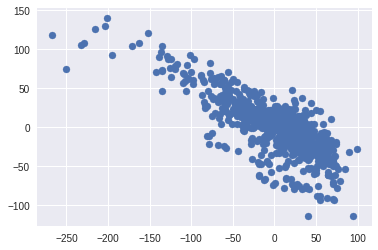

In [0]:
plt.scatter(pca1,pca2)

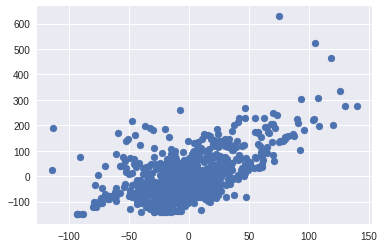

In [0]:
plt.scatter(pca2,pca3)


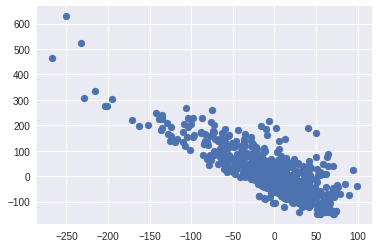

In [0]:
plt.scatter(pca1,pca3)

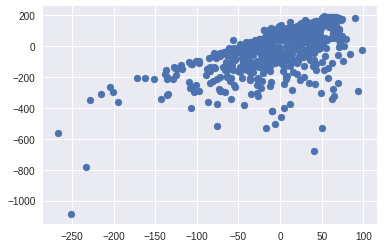

In [0]:
plt.scatter(pca1,pca4)

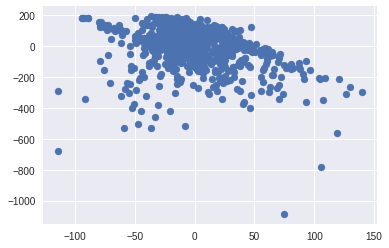

In [0]:
plt.scatter(pca2,pca4)

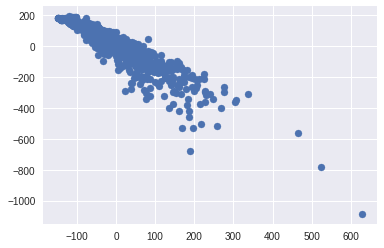

In [0]:
plt.scatter(pca3,pca4)

In [0]:
# Abaixo, replicamos o algoritmo extraído de http://physik.uni-graz.at/~pep/Lehre/CP2/EX07/Jacobi.py cujo resultado é
# similar à respectiva ferramenta do numpy.

In [0]:


def Jacobi(A):
    n     = A.shape[0]            # matrix size #columns = #lines
    maxit = 100                   # maximum number of iterations
    eps   = 1.0e-15               # accuracy goal
    pi    = np.pi        
    info  = 0                     # return flag
    ev    = np.zeros(n,float)     # initialize eigenvalues
    U     = np.zeros((n,n),float) # initialize eigenvector
    for i in range(0,n): U[i,i] = 1.0

    for t in range(0,maxit):
         s = 0;    # compute sum of off-diagonal elements in A(i,j)
         for i in range(0,n): s = s + np.sum(np.abs(A[i,(i+1):n]))
         if (s < eps): # diagonal form reached
              info = t
              for i in range(0,n):ev[i] = A[i,i]
              break
         else:
              limit = s/(n*(n-1)/2.0)       # average value of off-diagonal elements
              for i in range(0,n-1):       # loop over lines of matrix
                   for j in range(i+1,n):  # loop over columns of matrix
                       if (np.abs(A[i,j]) > limit):      # determine (ij) such that |A(i,j)| larger than average 
                                                         # value of off-diagonal elements
                           denom = A[i,i] - A[j,j]       # denominator of Eq. (3.61)
                           if (np.abs(denom) < eps): phi = pi/4         # Eq. (3.62)
                           else: phi = 0.5*np.arctan(2.0*A[i,j]/denom)  # Eq. (3.61)
                           si = np.sin(phi)
                           co = np.cos(phi)
                           for k in range(i+1,j):
                               store  = A[i,k]
                               A[i,k] = A[i,k]*co + A[k,j]*si  # Eq. (3.56) 
                               A[k,j] = A[k,j]*co - store *si  # Eq. (3.57) 
                           for k in range(j+1,n):
                               store  = A[i,k]
                               A[i,k] = A[i,k]*co + A[j,k]*si  # Eq. (3.56) 
                               A[j,k] = A[j,k]*co - store *si  # Eq. (3.57) 
                           for k in range(0,i):
                               store  = A[k,i]
                               A[k,i] = A[k,i]*co + A[k,j]*si
                               A[k,j] = A[k,j]*co - store *si
                           store = A[i,i]
                           A[i,i] = A[i,i]*co*co + 2.0*A[i,j]*co*si +A[j,j]*si*si  # Eq. (3.58)
                           A[j,j] = A[j,j]*co*co - 2.0*A[i,j]*co*si +store *si*si  # Eq. (3.59)
                           A[i,j] = 0.0                                            # Eq. (3.60)
                           for k in range(0,n):
                                store  = U[k,j]
                                U[k,j] = U[k,j]*co - U[k,i]*si  # Eq. (3.66)
                                U[k,i] = U[k,i]*co + store *si  # Eq. (3.67)
         info = -t # in case no convergence is reached set info to a negative value "-t"
    return ev,U,t

In [0]:
Jacobi(covar)

(array([7.75152920e+00, 9.27773222e+02, 3.89993454e+02, 1.96856402e+02,
        1.29225394e+04, 4.58206510e+01, 1.16471480e+05, 1.12632950e+02]),
 array([[ 9.86677164e-01,  2.28673088e-02,  2.28437416e-02,
         -4.87927285e-02, -1.93994861e-03,  5.30190605e-03,
         -2.73100093e-04,  1.51692930e-01],
        [ 6.30092224e-04,  9.72661103e-01, -1.40723957e-01,
          1.23085945e-01,  9.32259054e-02, -5.04680581e-02,
          1.32750975e-02, -8.69613556e-02],
        [-1.21885759e-03,  1.40124860e-01,  9.24284698e-01,
         -2.57206172e-01,  1.47546782e-02, -7.56725011e-02,
          3.04881858e-03, -2.32277845e-01],
        [-9.55611704e-04, -6.18201680e-02,  3.02733608e-01,
          8.84979920e-01,  5.84229399e-02, -2.20589633e-01,
          7.68416830e-03,  2.63074485e-01],
        [ 1.32749325e-03, -9.03835775e-02, -1.96817678e-02,
         -6.40536869e-02,  9.91127769e-01,  6.21506650e-03,
          7.04692392e-02, -6.39227745e-05],
        [-3.12490550e-03,  4.56858